# Homework 8. Shadrin Mikhail

Open `telco.dta` file.


**Dependent variable**:
`Customer category`

Predictors: select not less than 5 predictors, you can recode or modify the variables before you create a model. Make sure that the correlation between selected predictors is not high.

Use the multinomial logistic regression to analyze the data. 
1. Assess the quality of the model.
2. Which gradients are statistically significant? 
3. Interpret the influence of each predictor variable on the dependent variable. Please provide detailed interpretation using related risk ratio.
4. Create confusion matrix.
    * What is the percentage of correctly predicted cases by the model for each category of dependent variable?
    * Which category is predicted in the best way?
5. Analyze the case number 10.
    * To which category this customer really belongs to?
    * What is the probability that the customer will choose this category according to the model?
    * To which category should the customer belong to according to the model?

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

data = pd.read_stata("data/telco.dta")
data

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,tollfree,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,equipten,cardten,wireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,loglong,logtoll,logequi,logcard,logwire,lninc,custcat,churn
0,Zone 2,13.0,44.0,Married,9.0,64.0,College degree,5.0,No,Male,2.0,No,No,Yes,No,3.70,0.00,0.00,7.50,0.0,37.45,0.00,0.00,110.0,0.00,No,No,No,No,No,No,Yes,No,No,1.308333,NaN,NaN,2.014903,NaN,4.158883,Basic service,Yes
1,Zone 3,11.0,33.0,Married,7.0,136.0,Post-undergraduate degree,5.0,No,Male,6.0,Yes,No,Yes,Yes,4.40,20.75,0.00,15.25,35.7,42.00,211.45,0.00,125.0,380.35,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,1.481605,3.032546,NaN,2.724580,3.575151,4.912655,Total service,Yes
2,Zone 3,68.0,52.0,Married,24.0,116.0,Did not complete high school,29.0,No,Female,2.0,Yes,No,Yes,No,18.15,18.00,0.00,30.25,0.0,1300.60,1247.20,0.00,2150.0,0.00,No,No,No,No,Yes,Yes,No,Yes,No,2.898671,2.890372,NaN,3.409496,NaN,4.753590,Plus service,No
3,Zone 2,33.0,33.0,Unmarried,12.0,33.0,High school degree,0.0,No,Female,1.0,No,No,No,No,9.45,0.00,0.00,0.00,0.0,288.80,0.00,0.00,0.0,0.00,No,No,No,No,No,No,No,No,No,2.246015,NaN,NaN,NaN,NaN,3.496508,Basic service,Yes
4,Zone 2,23.0,30.0,Married,9.0,30.0,Did not complete high school,2.0,No,Male,4.0,No,No,No,No,6.30,0.00,0.00,0.00,0.0,157.05,0.00,0.00,0.0,0.00,No,No,No,No,Yes,No,Yes,Yes,No,1.840550,NaN,NaN,NaN,NaN,3.401197,Plus service,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Zone 3,10.0,39.0,Unmarried,0.0,27.0,Some college,0.0,No,Female,3.0,No,Yes,No,No,3.00,0.00,29.05,0.00,0.0,32.25,0.00,265.95,0.0,0.00,No,No,No,No,No,No,No,No,Yes,1.098612,NaN,3.369018,NaN,NaN,3.295837,Basic service,No
996,Zone 1,7.0,34.0,Unmarried,2.0,22.0,Post-undergraduate degree,5.0,No,Female,1.0,No,Yes,No,No,4.65,0.00,25.60,0.00,0.0,29.35,0.00,179.10,0.0,0.00,No,No,No,No,No,No,No,No,No,1.536867,NaN,3.242592,NaN,NaN,3.091042,Basic service,No
997,Zone 3,67.0,59.0,Unmarried,40.0,944.0,Post-undergraduate degree,33.0,No,Female,1.0,Yes,Yes,Yes,Yes,26.75,32.00,54.55,35.75,65.8,1837.55,2117.65,3636.60,2360.0,4392.85,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,3.286534,3.465736,3.999118,3.576550,4.186620,6.850126,Total service,No
998,Zone 3,70.0,49.0,Unmarried,18.0,87.0,High school degree,22.0,No,Female,1.0,Yes,No,Yes,No,25.60,33.50,0.00,25.25,0.0,1841.85,2368.20,0.00,1705.0,0.00,No,Yes,No,No,Yes,Yes,Yes,Yes,No,3.242592,3.511545,NaN,3.228826,NaN,4.465908,Plus service,No


For correct regression we need to find out which variables, which type each variable is and whether we have missing values in dataset

In [2]:
import pyreadstat
meta = pyreadstat.read_dta('data/telco.dta')[1]
meta_df = pd.DataFrame(meta.column_names_to_labels.items(), columns=['Variable', 'Description']).set_index('Variable')

dtypes_df = pd.DataFrame({'Variable' : data.dtypes.index, 'Type' : data.dtypes.values}).set_index('Variable')

is_nan_df =  pd.DataFrame({'Variable' : data.dtypes.index, 'NaN count' : [data[column].isna().sum() for column in data]}).set_index('Variable')

pd.set_option('display.max_rows', None)
var_stat_df = meta_df.join(dtypes_df).join(is_nan_df)
var_stat_df

,Description,Type,NaN count
Variable,,,
region,Geographic indicator,category,0
tenure,Months with service,float64,0
age,Age in years,float64,0
marital,Marital status,category,0
address,Years at current address,float64,0
income,Household income in thousands,float64,0
ed,Level of education,category,0
employ,Years with current employer,float64,0
retire,Retired,category,0


In [3]:
pd.set_option('display.max_rows', 10)

So there are 4 variables with NaN values, so we are to plot the distribution of variables to choose the strategy of filling missing values.

In [4]:
import matplotlib.pyplot as plt

data[['logtoll', 'logequi', 'logcard', 'logwire']].plot(subplots=True, figsize=(20,10))
plt.show()

<Figure size 2000x1000 with 4 Axes>

According to plots the relevant possible strategy for filling NaN values is filling them with means of neighbours

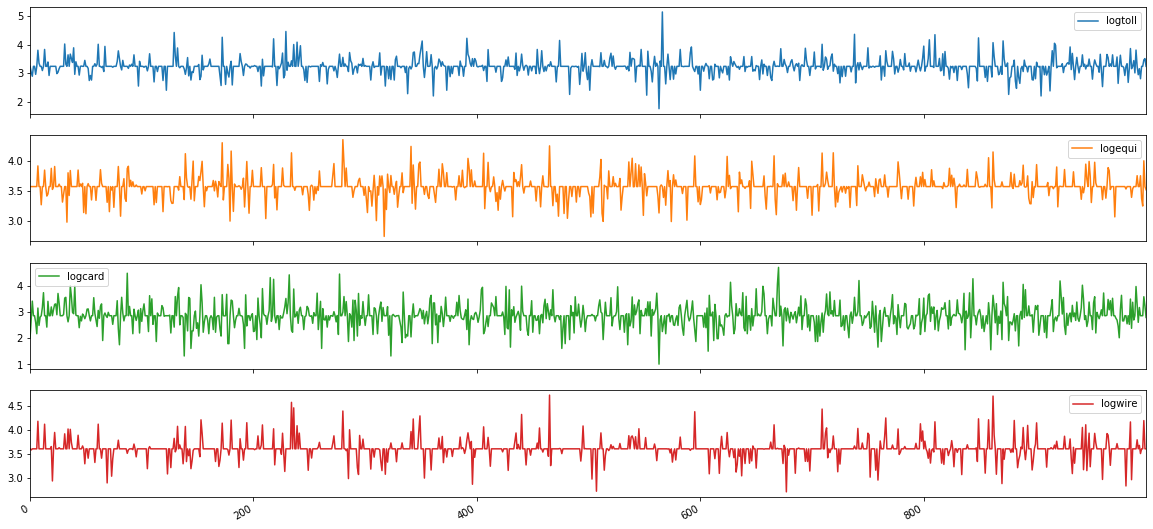

In [5]:
data.fillna(data.mean(), inplace=True)
data[['logtoll', 'logequi', 'logcard', 'logwire']].plot(subplots=True, figsize=(20,10))
plt.show()

Now it is more convinient to conduct miltinominal regression analysis.

The next step is to find all categorial variables and convert them into binominal ones. Except dependent variable

In [6]:
cols = var_stat_df[var_stat_df.Type == 'category'].index.drop(labels = ['custcat'])

for col in cols:
    print('Unique values of variable "{}":\n{}\n'.format(col, data[col].value_counts()))

Unique values of variable "region":
Zone 3    344
Zone 2    334
Zone 1    322
Name: region, dtype: int64

Unique values of variable "marital":
Unmarried    505
Married      495
Name: marital, dtype: int64

Unique values of variable "ed":
High school degree              287
College degree                  234
Some college                    209
Did not complete high school    204
Post-undergraduate degree        66
Name: ed, dtype: int64

Unique values of variable "retire":
No     953
Yes     47
Name: retire, dtype: int64

Unique values of variable "gender":
Female    517
Male      483
Name: gender, dtype: int64

Unique values of variable "tollfree":
No     526
Yes    474
Name: tollfree, dtype: int64

Unique values of variable "equip":
No     614
Yes    386
Name: equip, dtype: int64

Unique values of variable "callcard":
Yes    678
No     322
Name: callcard, dtype: int64

Unique values of variable "wireless":
No     704
Yes    296
Name: wireless, dtype: int64

Unique values of variable 

In [7]:
data_encoded = pd.get_dummies(data, prefix=cols, columns=cols, drop_first = True)
data_encoded

,tenure,age,address,income,employ,reside,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,equipten,cardten,wireten,loglong,logtoll,logequi,logcard,logwire,lninc,custcat,region_Zone 2,region_Zone 3,marital_Married,ed_High school degree,ed_Some college,ed_College degree,ed_Post-undergraduate degree,retire_Yes,gender_Female,tollfree_Yes,equip_Yes,callcard_Yes,wireless_Yes,multline_Yes,voice_Yes,pager_Yes,internet_Yes,callid_Yes,callwait_Yes,forward_Yes,confer_Yes,ebill_Yes,churn_Yes
0,13.0,44.0,9.0,64.0,5.0,2.0,3.70,0.00,0.00,7.50,0.0,37.45,0.00,0.00,110.0,0.00,1.308333,3.239705,3.568092,2.014903,3.598296,4.158883,Basic service,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
1,11.0,33.0,7.0,136.0,5.0,6.0,4.40,20.75,0.00,15.25,35.7,42.00,211.45,0.00,125.0,380.35,1.481605,3.032546,3.568092,2.724580,3.575151,4.912655,Total service,0,1,1,0,0,0,1,0,0,1,0,1,1,0,1,1,0,1,1,1,1,0,1
2,68.0,52.0,24.0,116.0,29.0,2.0,18.15,18.00,0.00,30.25,0.0,1300.60,1247.20,0.00,2150.0,0.00,2.898671,2.890372,3.568092,3.409496,3.598296,4.753590,Plus service,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,1,0,1,0,0
3,33.0,33.0,12.0,33.0,0.0,1.0,9.45,0.00,0.00,0.00,0.0,288.80,0.00,0.00,0.0,0.00,2.246015,3.239705,3.568092,2.854209,3.598296,3.496508,Basic service,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,23.0,30.0,9.0,30.0,2.0,4.0,6.30,0.00,0.00,0.00,0.0,157.05,0.00,0.00,0.0,0.00,1.840550,3.239705,3.568092,2.854209,3.598296,3.401197,Plus service,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10.0,39.0,0.0,27.0,0.0,3.0,3.00,0.00,29.05,0.00,0.0,32.25,0.00,265.95,0.0,0.00,1.098612,3.239705,3.369018,2.854209,3.598296,3.295837,Basic service,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
996,7.0,34.0,2.0,22.0,5.0,1.0,4.65,0.00,25.60,0.00,0.0,29.35,0.00,179.10,0.0,0.00,1.536867,3.239705,3.242592,2.854209,3.598296,3.091042,Basic service,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
997,67.0,59.0,40.0,944.0,33.0,1.0,26.75,32.00,54.55,35.75,65.8,1837.55,2117.65,3636.60,2360.0,4392.85,3.286534,3.465736,3.999118,3.576550,4.186620,6.850126,Total service,0,1,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
998,70.0,49.0,18.0,87.0,22.0,1.0,25.60,33.50,0.00,25.25,0.0,1841.85,2368.20,0.00,1705.0,0.00,3.242592,3.511545,3.568092,3.228826,3.598296,4.465908,Plus service,0,1,0,1,0,0,0,0,1,1,0,1,0,0,1,0,0,1,1,1,1,0,0


Finally, we are dropping dependent variable column and looking for 5 predictors with low correlation between them

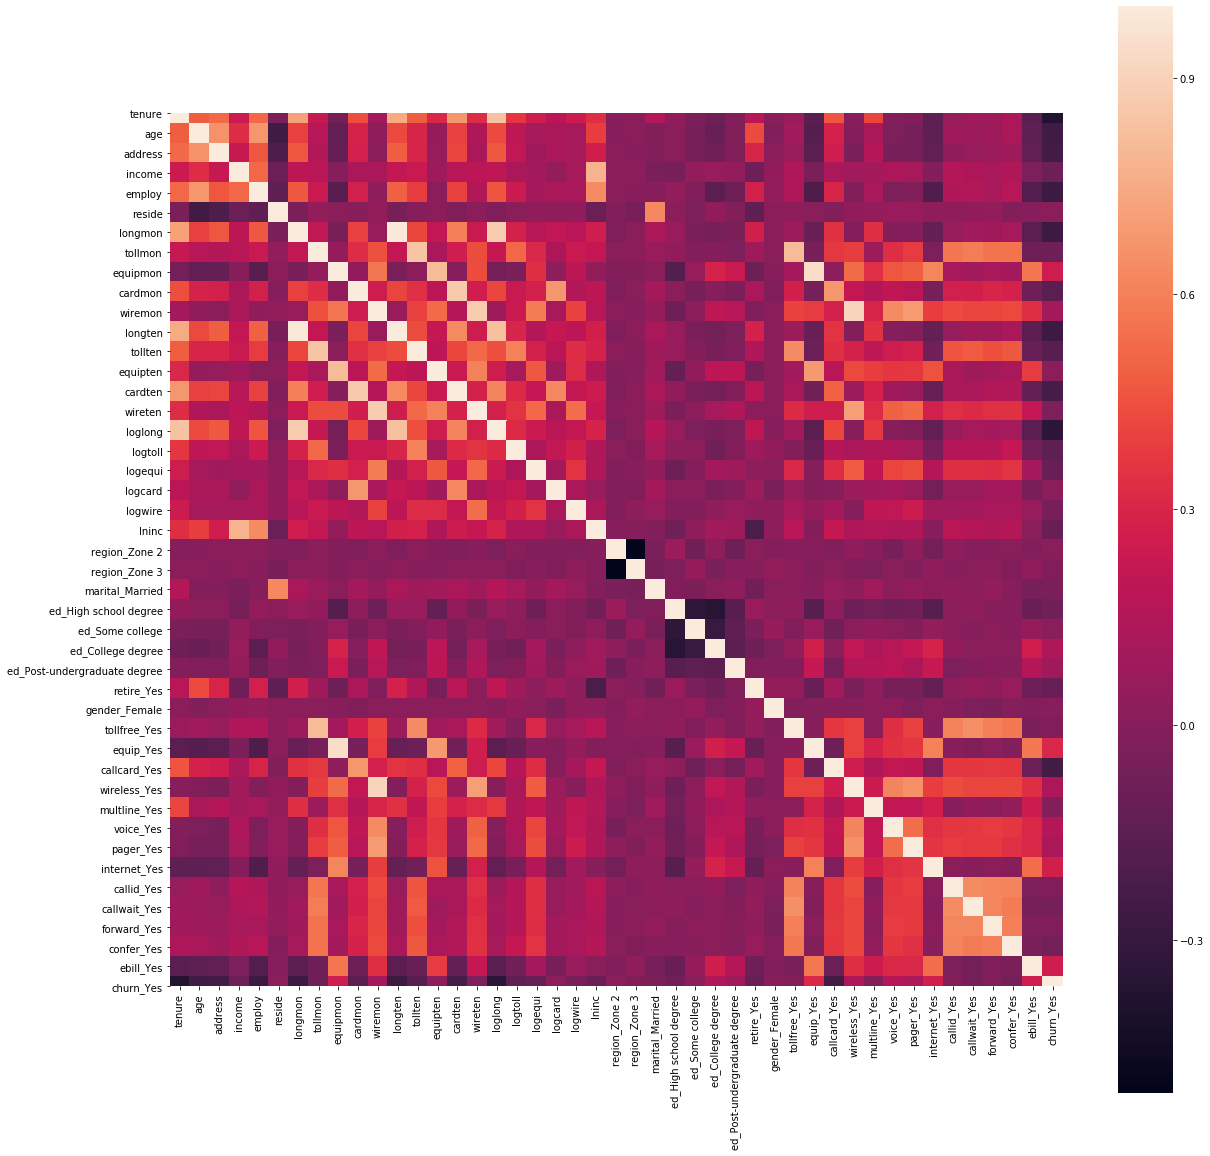

In [8]:
import seaborn as sns

plt.figure(figsize=(20, 20))
sns.heatmap(data_encoded.corr(), square = True)
plt.show()

From the plot above we can select following predictors:
* tenure
* income
* age
* reside
* equipmon
* region (Zone 1, Zone 2, Zone 3)
* marital (Married, Unmarried)
* gender (Male, Female)
* internet (Yes, No)
* education (High school degree, College degree, Some college, Did not complete high school, Post-undergraduate degree)
* wireless (Yes, No)
* tollfree (Yes, No)
* callcard (Yes, No)
    
Let's check their correlation between each other

In [9]:
predictors = data_encoded[['tenure', 
                           'income', 
                           'age', 
                           'reside', 
                           'equipmon',
                           'region_Zone 2', 'region_Zone 3',
                           'marital_Married',
                           'gender_Female', 
                           'internet_Yes',
                           'ed_High school degree', 'ed_Some college', 'ed_College degree', 'ed_Post-undergraduate degree',
                           'wireless_Yes',
                           'tollfree_Yes',
                           'callcard_Yes'
                          ]].copy()
predictors

,tenure,income,age,reside,equipmon,region_Zone 2,region_Zone 3,marital_Married,gender_Female,internet_Yes,ed_High school degree,ed_Some college,ed_College degree,ed_Post-undergraduate degree,wireless_Yes,tollfree_Yes,callcard_Yes
0,13.0,64.0,44.0,2.0,0.00,1,0,1,0,0,0,0,1,0,0,0,1
1,11.0,136.0,33.0,6.0,0.00,0,1,1,0,0,0,0,0,1,1,1,1
2,68.0,116.0,52.0,2.0,0.00,0,1,1,1,0,0,0,0,0,0,1,1
3,33.0,33.0,33.0,1.0,0.00,1,0,0,1,0,1,0,0,0,0,0,0
4,23.0,30.0,30.0,4.0,0.00,1,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10.0,27.0,39.0,3.0,29.05,0,1,0,1,0,0,1,0,0,0,0,0
996,7.0,22.0,34.0,1.0,25.60,0,0,0,1,0,0,0,0,1,0,0,0
997,67.0,944.0,59.0,1.0,54.55,0,1,0,1,1,0,0,0,1,1,1,1
998,70.0,87.0,49.0,1.0,0.00,0,1,0,1,0,1,0,0,0,0,1,1


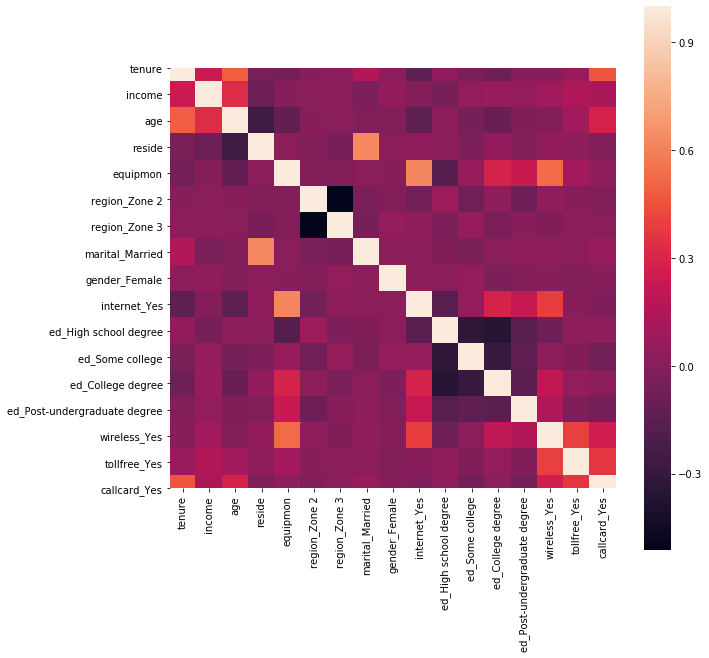

In [10]:
plt.figure(figsize=(10, 10))
sns.heatmap(predictors.corr(), square = True)
plt.show()

No big correlation is seen on the plot, so let's consider using this set of predictors for regression
___

### Creating Model

In [11]:
import statsmodels.api as sm

X = predictors.copy()
X = sm.add_constant(X)
Y = data['custcat'].copy()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [12]:
model = sm.MNLogit(Y, X)
fitted = model.fit()
print(fitted.summary())

Optimization terminated successfully.
         Current function value: 0.742571
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:                custcat   No. Observations:                 1000
Model:                        MNLogit   Df Residuals:                      946
Method:                           MLE   Df Model:                           51
Date:                Thu, 16 Apr 2020   Pseudo R-squ.:                  0.4624
Time:                        20:08:28   Log-Likelihood:                -742.57
converged:                       True   LL-Null:                       -1381.3
Covariance Type:            nonrobust   LLR p-value:                7.511e-234
           custcat=E-service       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -3.0815      0.625     -4.928      0.000

___

### Model Quality

As it can be seen from the results of MNLog regression above, `pseudo-R^2` value for this model = 0.4642, which means that this model describes 46.42% of observed cases.

Let's have a look on other quality metrics like True Positive Rate, False Positive Rate, Accuracy and AUC ROC

In [13]:
predictions = pd.DataFrame(fitted.pred_table()).rename(columns = fitted.model._ynames_map, index=fitted.model._ynames_map)
predictions

,Basic service,E-service,Plus service,Total service
Basic service,192.0,35.0,29.0,10.0
E-service,46.0,135.0,20.0,16.0
Plus service,36.0,28.0,197.0,20.0
Total service,6.0,13.0,38.0,179.0


In [14]:
import numpy as np

accuracy = np.diag(predictions).sum() / predictions.sum().sum()
tpr = np.diag(predictions) / predictions.sum(axis=1)
fpr = (predictions.sum(axis=0) - np.diag(predictions)) / predictions.sum(axis=0)
print("Accuracy: {}\n\nTrue Positive Rate:\n{}\n\nFalse Positive Rate:\n{}".format(accuracy, tpr, fpr))

Accuracy: 0.703

True Positive Rate:
Basic service    0.721805
E-service        0.622120
Plus service     0.701068
Total service    0.758475
dtype: float64

False Positive Rate:
Basic service    0.314286
E-service        0.360190
Plus service     0.306338
Total service    0.204444
dtype: float64


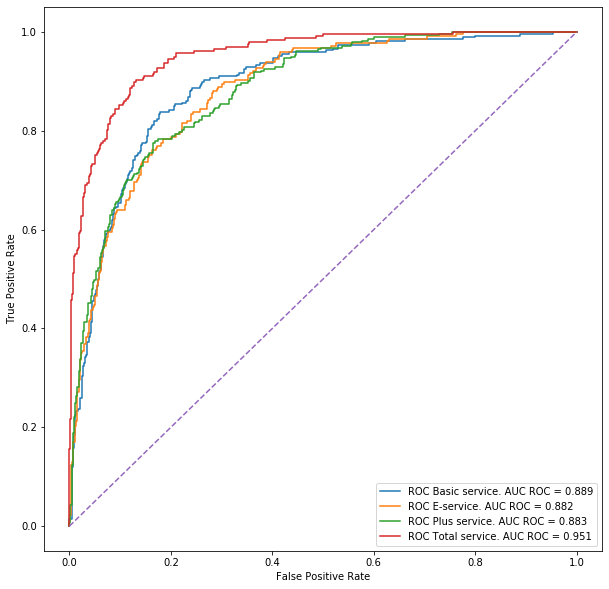

Mean AUC ROC: 0.902


In [15]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

columns = list(fitted.model._ynames_map.values())

Y_real = label_binarize(Y, classes=columns)
Y_predicted = fitted.predict()

scores = []
plt.figure(figsize=(10, 10))
for col_index in range(len(columns)):
    fpr, tpr, _ = roc_curve(Y_real[:, col_index], Y_predicted[:, col_index])
    score = auc(fpr, tpr)
    scores.append(score)
    plt.plot(fpr, tpr, label='ROC {}. AUC ROC = {:.3f}'.format(columns[col_index], score))

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
print('Mean AUC ROC: {:.3f}'.format(np.mean(scores)))

___

### Describing Model

In [16]:
params = fitted.params.copy()
service_columns = ['E-service', 'Plus Service', 'Total Service'] 
params.columns = service_columns
params

,E-service,Plus Service,Total Service
const,-3.081501,-1.680703,-6.510264
tenure,0.079665,0.028364,0.035270
income,0.000336,0.001737,0.001832
age,-0.027181,-0.020362,-0.020631
reside,0.083696,-0.027199,0.244909
...,...,...,...
ed_College degree,1.077207,-0.328294,0.914550
ed_Post-undergraduate degree,1.448027,-0.070159,1.493001
wireless_Yes,-0.255704,1.111010,3.223140
tollfree_Yes,-0.100325,2.786765,2.899250


In [17]:
from IPython.display import display

def is_significant(p_value, level):
    if abs(p_value) < level:
        return 'Yes'
    else:
        return 'No'
    
def find_significant_coefficients(coefs, p_values, col_name):
    merged = pd.DataFrame({'Coefficient' : coefs[col_name], 'P-value' : p_values[col_name]})
    merged['Is Significant at 1%?'] = merged['P-value'].apply(lambda x: is_significant(x, 0.01))
    merged['Is Significant at 5%?'] = merged['P-value'].apply(lambda x: is_significant(x, 0.05))
    merged['Is Significant at 10%?'] = merged['P-value'].apply(lambda x: is_significant(x, 0.1))
    return merged
    
def count_significant_coefficients(significance_df, significance_level):
    col_name = 'Is Significant at {}%?'.format(int(significance_level * 100))
    overall_coefs = len(significance_df.index)
    significant_coefs = len(significance_df[significance_df[col_name] == 'Yes'].index)
    print("{} coefficients are statistically significant at {} significance level out of {} coefs ".format(significant_coefs, significance_level, overall_coefs))
    
p_values =  fitted.pvalues.copy()
p_values.columns = service_columns

pd.set_option('display.max_rows', None)

for col_name in service_columns:
    print("For {} customer category coefficients are:\n".format(col_name))
    custcat_with_significance = find_significant_coefficients(params, p_values, col_name)
    display(custcat_with_significance)
    count_significant_coefficients(custcat_with_significance, 0.01)
    count_significant_coefficients(custcat_with_significance, 0.05)
    count_significant_coefficients(custcat_with_significance, 0.1)
    print('\n')

For E-service customer category coefficients are:



,Coefficient,P-value,Is Significant at 1%?,Is Significant at 5%?,Is Significant at 10%?
const,-3.081501,8.289045e-07,Yes,Yes,Yes
tenure,0.079665,5.909836e-21,Yes,Yes,Yes
income,0.000336,8.267565e-01,No,No,No
age,-0.027181,1.537733e-02,No,Yes,Yes
reside,0.083696,4.562334e-01,No,No,No
equipmon,0.029700,2.265492e-03,Yes,Yes,Yes
region_Zone 2,-0.204678,4.538517e-01,No,No,No
region_Zone 3,-0.533303,4.971412e-02,No,Yes,Yes
marital_Married,-0.129636,6.706231e-01,No,No,No
gender_Female,0.183486,4.044887e-01,No,No,No


6 coefficients are statistically significant at 0.01 significance level out of 18 coefs 
9 coefficients are statistically significant at 0.05 significance level out of 18 coefs 
10 coefficients are statistically significant at 0.1 significance level out of 18 coefs 


For Plus Service customer category coefficients are:



,Coefficient,P-value,Is Significant at 1%?,Is Significant at 5%?,Is Significant at 10%?
const,-1.680703,5.704577e-03,Yes,Yes,Yes
tenure,0.028364,7.855089e-05,Yes,Yes,Yes
income,0.001737,2.386539e-01,No,No,No
age,-0.020362,6.460792e-02,No,No,Yes
reside,-0.027199,8.044857e-01,No,No,No
equipmon,-0.002542,8.187176e-01,No,No,No
region_Zone 2,-0.413237,1.443001e-01,No,No,No
region_Zone 3,-0.571961,3.978237e-02,No,Yes,Yes
marital_Married,0.298381,3.212842e-01,No,No,No
gender_Female,0.089329,6.917657e-01,No,No,No


6 coefficients are statistically significant at 0.01 significance level out of 18 coefs 
7 coefficients are statistically significant at 0.05 significance level out of 18 coefs 
8 coefficients are statistically significant at 0.1 significance level out of 18 coefs 


For Total Service customer category coefficients are:



,Coefficient,P-value,Is Significant at 1%?,Is Significant at 5%?,Is Significant at 10%?
const,-6.510264,7.580041e-12,Yes,Yes,Yes
tenure,0.035270,1.578647e-04,Yes,Yes,Yes
income,0.001832,2.659066e-01,No,No,No
age,-0.020631,1.761271e-01,No,No,No
reside,0.244909,8.327314e-02,No,No,Yes
equipmon,0.042117,2.103689e-04,Yes,Yes,Yes
region_Zone 2,-0.202847,5.891635e-01,No,No,No
region_Zone 3,-0.283197,4.406714e-01,No,No,No
marital_Married,0.263753,5.042071e-01,No,No,No
gender_Female,-0.001847,9.950501e-01,No,No,No


6 coefficients are statistically significant at 0.01 significance level out of 18 coefs 
8 coefficients are statistically significant at 0.05 significance level out of 18 coefs 
10 coefficients are statistically significant at 0.1 significance level out of 18 coefs 




As we can see only one third of coefficients in average are statistically significant at 0.01 significance level and 8 and 10 in average at 0.05 and 0.1 levels respectively
___

### Relative Risk Ratio

In [18]:
relative_risk_ratios = np.exp(params)
relative_risk_ratios

,E-service,Plus Service,Total Service
const,0.045890,0.186243,0.001488
tenure,1.082924,1.028770,1.035900
income,1.000336,1.001739,1.001833
age,0.973185,0.979844,0.979580
reside,1.087298,0.973168,1.277506
equipmon,1.030145,0.997461,1.043017
region_Zone 2,0.814910,0.661505,0.816403
region_Zone 3,0.586664,0.564417,0.753372
marital_Married,0.878415,1.347675,1.301807
gender_Female,1.201398,1.093440,0.998155


##### Common tendencies relative to Basic Service:
* People with bigger `tenure` are a bit more likely to upgrade their plan from Basic to E-service/Plus/Total services
* People with bigger `income` are also slightly more likely to upgrade their plan from Basic to E-service/Plus/Total services
* The older people are (so the grater their `age`), the more they prefer Basic plan
* Citizens of `Zone 2` and `Zone 3` (which are further from the center) are much less likely to order any service plan different from Basic

##### E-service relative to Basic Service:
* `Married` people are more likely to prefer Basic Service plan instead of E-service
* People with bigger `reside` are more likely likely to prefer E-service plan over Basic
* Being `Female`, increases chances to select E-service plan over Basic by 1.2
* Having `internet` increases the relative risk for preferring E-service plan over Basic by factor of 3.37
* Any level of `education` increases E-services preferences in compare to Basic. The greater educational level, the bigger relative risk of selecting E-service plan (by 1.79/2.63/2.94/4.25 respectively to high school degree/some college/college degree/post-undergraduate degree)
* Any preferences in `wireless`, `tollfree` or `calling card` services decreases risks to prefer E-services plan by factor of 0.77, 0.9 and 0.73 respectively

##### Plus relative to Basic:
* `Married` people are more likely to prefer Plus Service plan instead of Basic
* People with bigger `reside` are slightly less interested in Plus plan over Basic. Each person in a household decreases risk to select Plus by 0.98
* Being `Female`, increases chances to select Plus plan over Basic by 1.09
* Having `internet` decreases the relative risk for preferring Plus plan over Basic by factor of 0.37
* Only "some college" level of `education` increases Plus preferences in compare to Basic by 1.14. The rest levels of education are more likely to prefer Basic plan instead of Plus
* Any preferences in `wireless`, `tollfree` or `calling card` services increases risks to prefer Plus plan by factor of 3.04, 16.23 and 2.85 respectively

##### Total relative to Basic:
* `Married` people are more likely to prefer Total Service plan instead of Basic
* People with bigger `reside` are more interested in Total plan over Basic. Each person in a household decreases risk to select Plus by 1.28
* Being `Female`, slightly decreases chances to select Total plan over Basic by 0.998. Basicaly, we can say that selecting Total service does not depend on a gender
* Having `internet` increases the relative risk for preferring Total plan over Basic by factor of 2.71
* Any level of `education` increases Total preferences in compare to Basic. The greater educational level, the bigger relative risk of selecting Total plan (by 1.85/2.02/2.50/4.45 respectively to high school degree/some college/college degree/post-undergraduate degree)
* Any preferences in `wireless`, `tollfree` or `calling card` services increases risks to prefer Total plan by factor of 25.11, 18.16 and 4.03 respectively
___

### Confusion Matrix

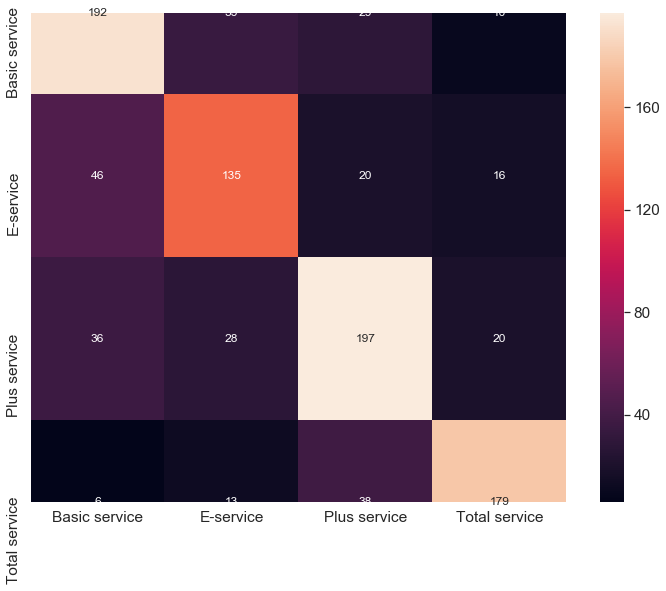

In [19]:
import seaborn as sn

plt.figure(figsize=(12, 9))
sn.set(font_scale=1.4)
sn.heatmap(predictions, annot=True, annot_kws={"size": 12}, fmt='g')
plt.show()

Talking about the best predicted category let's have a look at section "Model Quality" where TPR were calculated. We can see that te highest ratio for TRP is relevant to Total sevrices category as ~75.85%
___

### Analyze the case 10

In [20]:
case = data.loc[10]
display(case)
print("Actual client's category is {}".format(case.at['custcat']))

region              Zone 2
tenure                   5
age                     33
marital          Unmarried
address                 10
income                 125
ed          College degree
employ                   5
retire                  No
gender              Female
reside                   1
tollfree                No
equip                  Yes
callcard                No
wireless                No
longmon               4.85
tollmon                  0
equipmon             26.15
cardmon                  0
wiremon                  0
longten              17.25
tollten                  0
equipten             110.1
cardten                  0
wireten                  0
multline                No
voice                   No
pager                  Yes
internet               Yes
callid                  No
callwait                No
forward                 No
confer                  No
ebill                  Yes
loglong            1.57898
logtoll            3.23971
logequi            3.26385
l

Actual client's category is Basic service


In [22]:
case_predicted = fitted.predict(X.iloc[10].values)[0]
for i in range(len(case_predicted)):
    print('{:.3f}% chance of relation to {} class'.format(100 * case_predicted[i], columns[i]))

58.305% chance of relation to Basic service class
38.902% chance of relation to E-service class
1.399% chance of relation to Plus service class
1.394% chance of relation to Total service class


According to our model the 10's client is also relative to Basic service client category